# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [43]:
print(weather_api_key)

288d75d9d2f73020a35c8317a1b98d5e


### Generate the Cities List by Using the `citipy` Library

In [44]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [45]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | harper
Processing Record 3 of Set 1 | nowrangapur
City not found. Skipping...
Processing Record 4 of Set 1 | swellendam
Processing Record 5 of Set 1 | coruripe
Processing Record 6 of Set 1 | broome
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | chonchi
Processing Record 9 of Set 1 | semibratovo
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | minas de marcona
Processing Record 15 of Set 1 | wailua homesteads
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | happy valley-goose bay
Processing Record 18 of Set 1 | karratha
Processing Record 19 of Set 1 | dolinsk
Processing Record 20 of Set 1 | toga village
City not found. Skipping...
Processing Record 21 of Set 1

In [46]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [47]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,-20.15,99,100,1.26,CA,1703823893
1,harper,4.3750,-7.7169,26.37,82,1,1.84,LR,1703823893
2,swellendam,-34.0226,20.4417,19.59,85,23,1.03,ZA,1703823893
3,coruripe,-10.1256,-36.1756,26.32,74,75,4.07,BR,1703823894
4,broome,42.2506,-75.8330,9.21,98,100,0.00,US,1703823894


In [48]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [49]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-20.15,99,100,1.26,CA,1703823893
1,harper,4.3750,-7.7169,26.37,82,1,1.84,LR,1703823893
2,swellendam,-34.0226,20.4417,19.59,85,23,1.03,ZA,1703823893
3,coruripe,-10.1256,-36.1756,26.32,74,75,4.07,BR,1703823894
4,broome,42.2506,-75.8330,9.21,98,100,0.00,US,1703823894


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

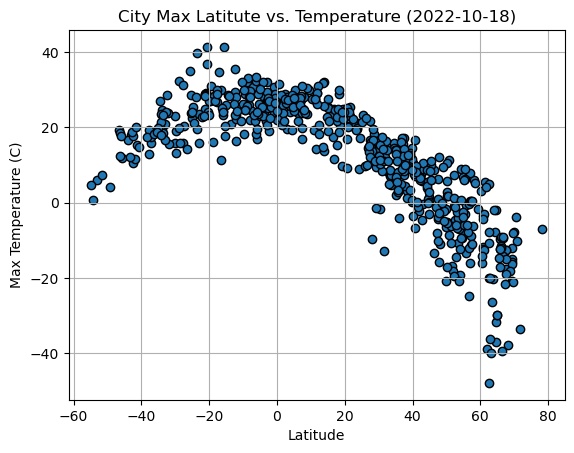

In [50]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o', edgecolors= 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitute vs. Temperature (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

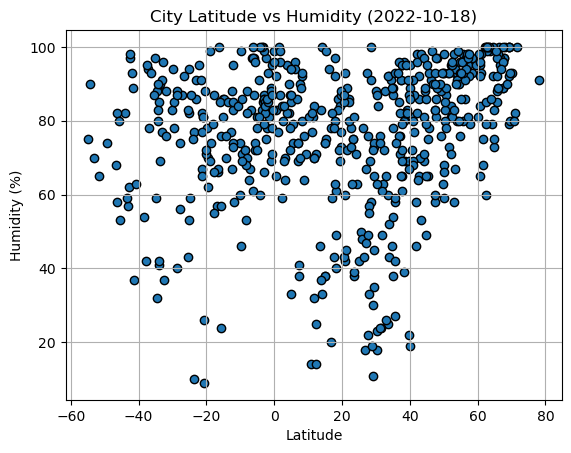

In [51]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o', edgecolors= 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

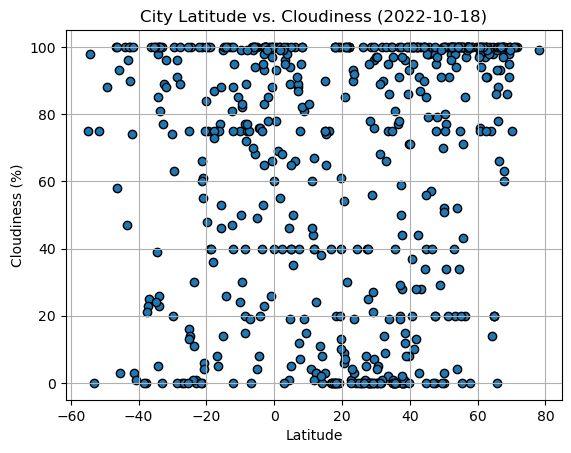

In [52]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

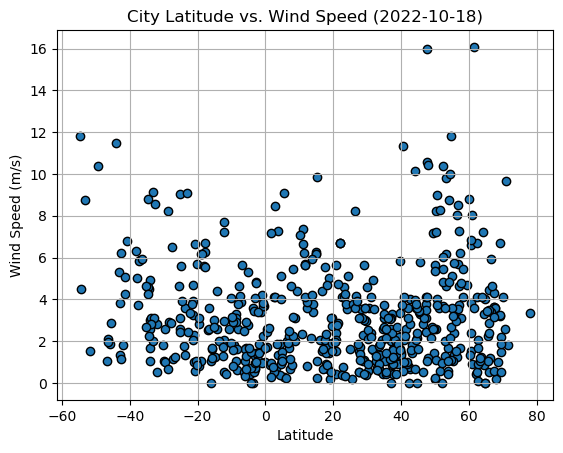

In [53]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [54]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis,eq_loc):  
    correlation = st.pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq= f"y ={p_slope: .2f}x +{ p_int: .2f}"

    plt.scatter(x_axis, y_axis, marker = 'o', edgecolors='black')
    plt.plot(x_axis, p_fit, "-", color = 'red')
    plt.annotate(eq, eq_loc, fontsize = 12, color = 'red')
    print(f"The r-value is {round(correlation[0], 2)}")

In [55]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0] 

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-20.15,99,100,1.26,CA,1703823893
1,harper,4.3750,-7.7169,26.37,82,1,1.84,LR,1703823893
4,broome,42.2506,-75.8330,9.21,98,100,0.00,US,1703823894
7,semibratovo,57.3046,39.5369,-8.92,98,100,1.69,RU,1703823894
8,tiksi,71.6872,128.8694,-33.66,100,100,1.81,RU,1703823895


In [56]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,swellendam,-34.0226,20.4417,19.59,85,23,1.03,ZA,1703823893
3,coruripe,-10.1256,-36.1756,26.32,74,75,4.07,BR,1703823894
5,blackmans bay,-43.0167,147.3167,18.07,57,96,1.34,AU,1703823894
6,chonchi,-42.6128,-73.8092,10.56,97,90,1.14,CL,1703823894
9,waitangi,-43.9535,-176.5597,16.57,82,100,11.46,NZ,1703823895


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.87


Text(0, 0.5, 'Max Temp')

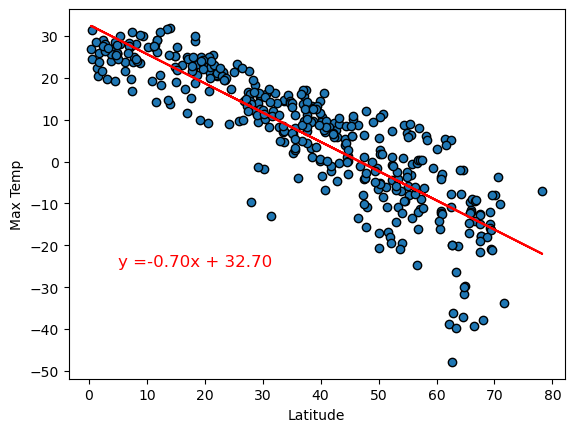

In [57]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], (5, -25))
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

The r-value is 0.6


Text(0, 0.5, 'Max Temp')

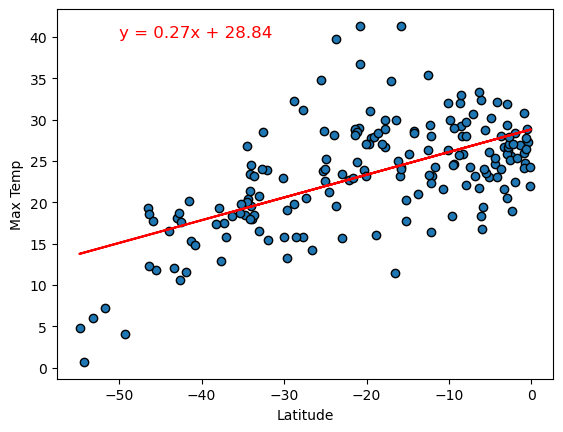

In [58]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], (-50, 40))
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

**Discussion about the linear relationship:** 
When it comes to the relationship between Latitude and Temperature, the correlation is opposite across in the two hemisphere. In the Northern Hemisphere, there's a strong, negative correlation between a city's latitude and it's max-temperature with r-value = 0.87. This means that cities closer to the North pole have much lower max-temperature than those closer to the equator. On the other half, there's a moderately strong, positive relationship between a city's latitude and its max-tempature, with r-value = 0.60. This means that cities closer to the equator have a higher max-temperature than those closer to the South Pole, however the relationship is not as strong as seen in the Northern Hemisphere. This weaker correlation may be attributed to the fact that less cities exist closer to the South Pole (i.e. higher latitude in the Southern Hemisphere) than in the Northern Hemisphere, where you're more likely to have habitable closer to the North Pole (i.e. higher latitude in the Northern Hemisphere)

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.37


Text(0, 0.5, 'Humidity')

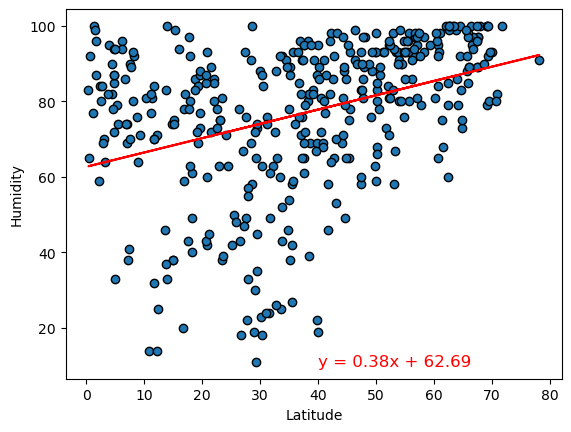

In [59]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], (40, 10))
plt.xlabel('Latitude')
plt.ylabel('Humidity')

The r-value is 0.19


Text(0, 0.5, 'Humidity')

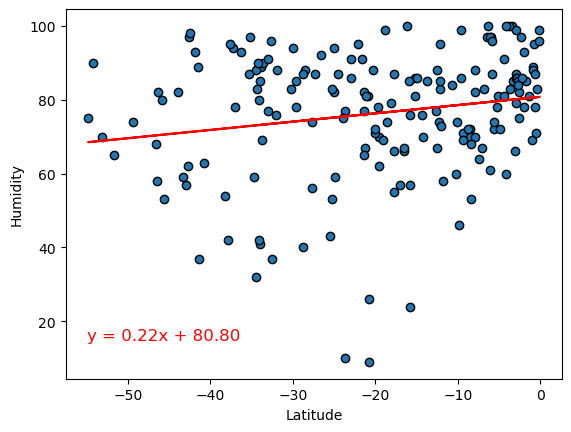

In [60]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], (-55, 15))
plt.xlabel('Latitude')
plt.ylabel('Humidity')

**Discussion about the linear relationship:** 
In both the Northern and Southern Hemisphere, there's a positive correlation between the city's Latitude and Humidity. However this is interpreted differently across the two hemispheres. In the Northern Hemisphere, the postive correlation of 0.37, which is relatively weak, indicates that cities with higher latitude -  closer to the North Pole - are more humid than those closer to the equator. While in the Southern Hemisphere, the positive correlation of 0.19, a weak correlation, indicates that cities closer to the equator may be more humid than those closer to the South Pole 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.31


Text(0, 0.5, 'Cloudiness')

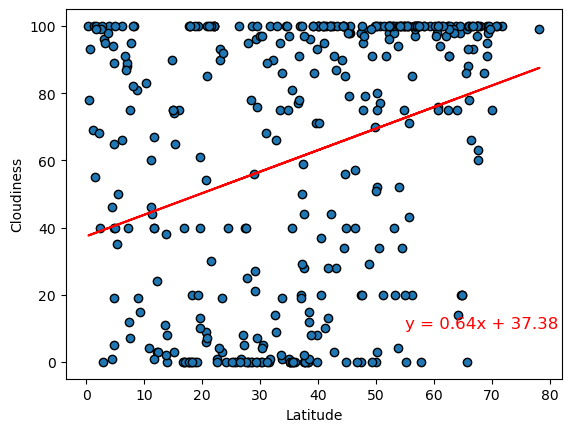

In [61]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], (55, 10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

The r-value is 0.12


Text(0, 0.5, 'Cloudiness')

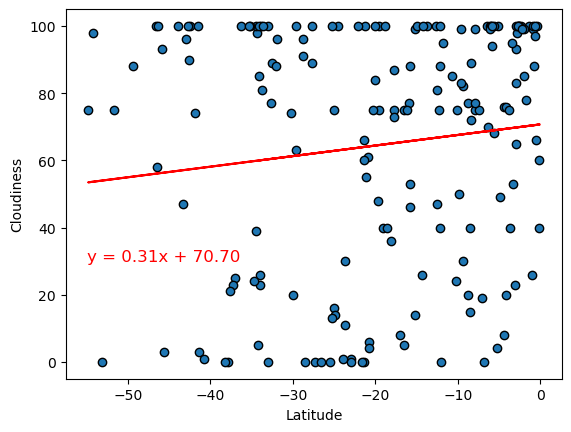

In [62]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], (-55, 30))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

**Discussion about the linear relationship:** 
In both the Northern and Southern Hemisphere, there's a positive correlation between the city's Latitude and Cloudiness. However this is interpreted differently across the two hemispheres. In the Northern Hemisphere, the postive correlation of 0.31 indicates that cities with higher latitude -  closer to the North Pole - experience more cloudines than those closer to the equator, but sincei it's a low r-value, the correlation is fairly weak. While in the Southern Hemisphere, the positive correlation of 0.12, while a weaker correlation, indicates that cities closer to the equator may be slightly more cloudy than those closer to the South Pole 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.11


Text(0, 0.5, 'Wind Speed')

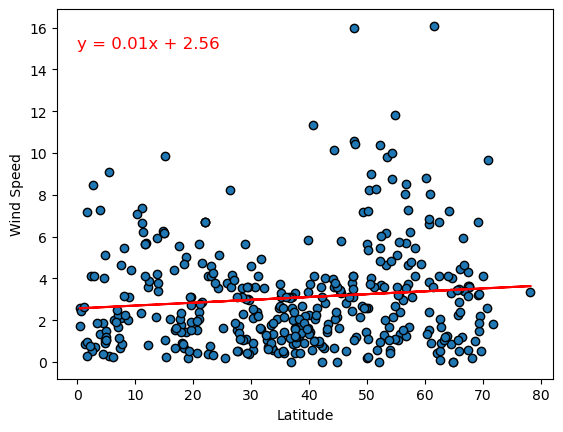

In [63]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], (0, 15))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

The r-value is -0.39


Text(0, 0.5, 'Wind Speed')

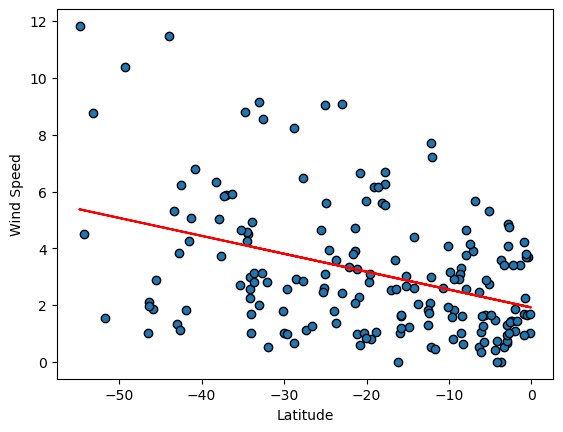

In [64]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], (-55, 15))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

**Discussion about the linear relationship:** 
There appears to be a very weak correlation between Latitude and Wind Speed in both the Northern and Southern Hemisphere. In the Northern Hemisphere 
, the correlation coefficient is 0.11 indicating a weak (but positive) linear relationship between Latitude nad Wind Speed. Meanwhile, in the Southern Hemisphere, the r-value of -0.39 indicated a negative yet still weak correlation between Latitude and Wind Speed, meaning that cities closer to the equator may tend to have slower wind speeds. 
Between the Southern and Northern Hemisphere regression, the Southern Hemisphere linear regression is slightly stronger. 